In [3]:
!pip install geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ------ -------------------------------- 20.5/125.4 kB 682.7 kB/s eta 0:00:01
   --------------- ----------------------- 51.2/125.4 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.core.display import display, HTML
import time


C:\Users\deept\AppData\Local\Temp\ipykernel_6492\631953607.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [8]:
df=pd.read_csv('zomato_data.csv')

In [10]:
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [12]:
df.shape

(51717, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [16]:
df.isnull().sum()

online_order                     0
book_table                       0
rate                          7775
votes                            0
rest_type                      227
dish_liked                   28078
cuisines                        45
approx_costfor_two_people      346
listed_intype                    0
listed_incity                    0
dtype: int64

In [18]:
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [20]:
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [22]:
data.listed_incity.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [24]:
data.listed_intype.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [26]:
data.cuisines.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [28]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [30]:
data.describe(include=['O'])

,online_order,book_table,rate,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
count,51717,51717,43942,51490,23639,51672,51371,51717,51717
unique,2,2,64,93,5271,2723,70,7,30
top,Yes,No,NEW,Quick Bites,Biryani,North Indian,300,Delivery,BTM
freq,30444,45268,2208,19132,182,2913,7576,25942,3279


In [32]:
# Null values detection
data.isna().sum()
# job_title has large number of null values

online_order                     0
book_table                       0
rate                          7775
votes                            0
rest_type                      227
dish_liked                   28078
cuisines                        45
approx_costfor_two_people      346
listed_intype                    0
listed_incity                    0
dtype: int64

In [34]:
## % of null values
data.isna().sum()/len(data)

online_order                 0.000000
book_table                   0.000000
rate                         0.150337
votes                        0.000000
rest_type                    0.004389
dish_liked                   0.542916
cuisines                     0.000870
approx_costfor_two_people    0.006690
listed_intype                0.000000
listed_incity                0.000000
dtype: float64

In [36]:
def cont_vis_analysis(data,col):
  ## visualisation of continuous numerical variable
  fig,axes=plt.subplots(1,3,figsize=(8,3),layout='constrained')
  fig.suptitle('Continuous Data Distributions')

  axes[0].set_title('Histogram')
  sns.histplot(data[col],ax=axes[0])

  axes[1].set_title('KDE plot')
  sns.kdeplot(data[col],ax=axes[1])

  axes[2].set_title('Boxplot')
  sns.boxplot(data[col],ax=axes[2])

  fig.show()

def cont_non_vis_analysis(data,col):
  ## Non visual analaysis of continuous numerical data
  series=data[col]
  print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']).round(2))
  # round(2) - round off values upto 2 decimals
  print()


def catg_disc_analysis(data,col):
  # EDA of categorical and discrete num data
  print("Value Counts for ",col)
  print(data[col].value_counts())
  print("Null values =",data[col].isna().sum())
  fig,axes=plt.subplots(1,2,figsize=(8,3),layout='constrained')
  fig.suptitle('Categorical / Discrete Num Data Distributions')

  axes[0].set_title('Bar Plot')
  sns.countplot(x=col,data=data,ax=axes[0])

  axes[1].set_title('Pie Chart')
  vc_data=data[col].value_counts()
  axes[1].pie(vc_data,labels=vc_data.index,autopct='%1.1f%%')
  fig.show()

Non Visual Analysis
count      51717.00
min            0.00
max        16832.00
mean         283.70
median        41.00
var       646156.90
std          803.84
skew           7.55
kurt          88.87
Name: votes, dtype: float64

Visual Analysis


C:\Users\deept\AppData\Local\Temp\ipykernel_6492\2274706611.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


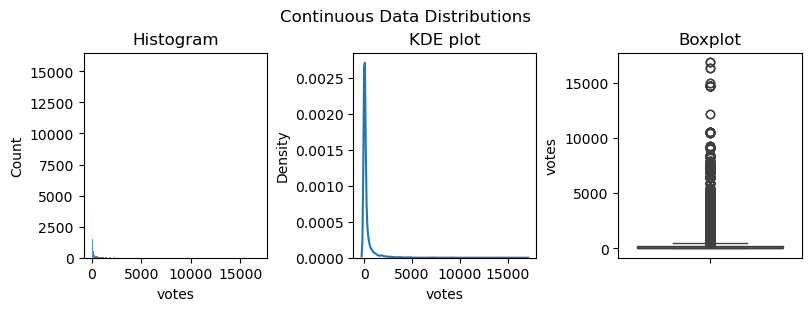

In [40]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'votes')
print("Visual Analysis")
cont_vis_analysis(data,'votes')

In [50]:


data['rate'] = data['rate'].str.replace(r'[^0-9.]', '', regex=True)
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')

data['approx_costfor_two_people'] = data['approx_costfor_two_people'].str.replace(r'[^0-9.]', '', regex=True)
data['approx_costfor_two_people'] = pd.to_numeric(data['approx_costfor_two_people'], errors='coerce')



Non Visual Analysis
count      51371.00
min           40.00
max         6000.00
mean         555.43
median       400.00
var       192589.96
std          438.85
skew           2.60
kurt          10.45
Name: approx_costfor_two_people, dtype: float64

Visual Analysis


C:\Users\deept\AppData\Local\Temp\ipykernel_6492\2274706611.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


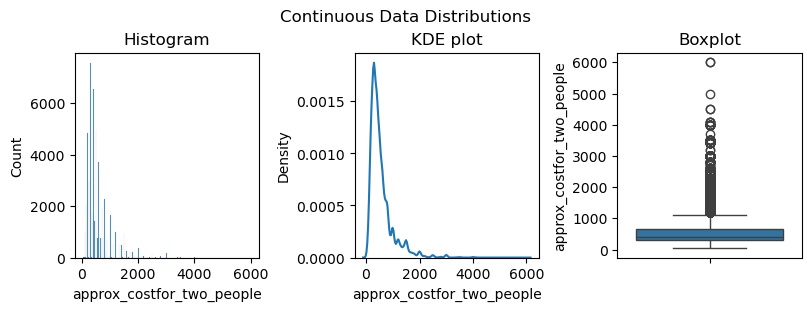

In [52]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'approx_costfor_two_people')
print("Visual Analysis")
cont_vis_analysis(data,'approx_costfor_two_people')

Non Visual Analysis
count     41665.00
min           1.85
max           4.95
mean          3.75
median        3.75
var           0.19
std           0.44
skew         -0.33
kurt         -0.01
Name: rate, dtype: float64

Visual Analysis


C:\Users\deept\AppData\Local\Temp\ipykernel_6492\2274706611.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


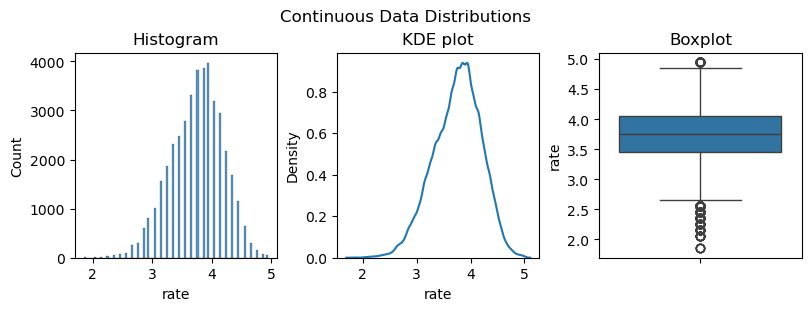

In [54]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'rate')
print("Visual Analysis")
cont_vis_analysis(data,'rate')

In [56]:
df['rate'] = df['rate'].replace('-', np.nan)  #Replace '-' values with NaN
#df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # Converts valid values to float, others to NaN



In [58]:
df['rate'] = df['rate'].replace('/5', '')  #Replace '-' values with NaN
#df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # Converts valid values to float, others to NaN



In [60]:
df['rate'] = df['rate'].fillna(df['rate'].median())

In [62]:
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].replace(',', '') 

In [64]:
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].fillna(df['approx_costfor_two_people'].median())

In [66]:
df['dish_liked'] = df['dish_liked'].fillna('Not Available')

In [68]:
df['cuisines'] = df['cuisines'].fillna('Other')

In [72]:
df['rest_type'] = df['rest_type'].fillna('Unknown')

In [74]:
df['votes'] = df['votes'].fillna(df['votes'].median())

In [78]:
## label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() # create an object of LabelEncoder class
data['online_order_en']=le.fit_transform(data['online_order'])
data

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,online_order_en
0,Yes,Yes,4.15,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,1
1,Yes,No,4.15,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1
2,Yes,No,3.85,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1
3,No,No,3.75,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,No,No,3.85,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,0
...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.65,27,Bar,NaN,Continental,1500.0,Pubs and bars,Whitefield,0
51713,No,No,NaN,0,Bar,NaN,Finger Food,600.0,Pubs and bars,Whitefield,0
51714,No,No,NaN,0,Bar,NaN,Finger Food,2000.0,Pubs and bars,Whitefield,0
51715,No,Yes,4.35,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield,0


In [80]:
## label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() # create an object of LabelEncoder class
data['book_table_en']=le.fit_transform(data['book_table'])
data

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,online_order_en,book_table_en
0,Yes,Yes,4.15,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,1,1
1,Yes,No,4.15,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1,0
2,Yes,No,3.85,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1,0
3,No,No,3.75,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,0,0
4,No,No,3.85,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.65,27,Bar,NaN,Continental,1500.0,Pubs and bars,Whitefield,0,0
51713,No,No,NaN,0,Bar,NaN,Finger Food,600.0,Pubs and bars,Whitefield,0,0
51714,No,No,NaN,0,Bar,NaN,Finger Food,2000.0,Pubs and bars,Whitefield,0,0
51715,No,Yes,4.35,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield,0,1


In [82]:
## drop log transformerd columns
data.drop(['online_order','book_table'],axis=1,inplace=True)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rate                       41665 non-null  float64
 1   votes                      51717 non-null  int64  
 2   rest_type                  51490 non-null  object 
 3   dish_liked                 23639 non-null  object 
 4   cuisines                   51672 non-null  object 
 5   approx_costfor_two_people  51371 non-null  float64
 6   listed_intype              51717 non-null  object 
 7   listed_incity              51717 non-null  object 
 8   online_order_en            51717 non-null  int32  
 9   book_table_en              51717 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 3.6+ MB


In [88]:
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].astype(int)

In [92]:
df1=pd.read_csv('Geographical Coordinates.csv')

In [94]:
merged_df = pd.merge(data, df1, on='listed_incity', how='left')

In [96]:
merged_df

,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,online_order_en,book_table_en,Latitude,Longitude
0,4.15,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,1,1,12.939333,77.553982
1,4.15,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1,0,12.939333,77.553982
2,3.85,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1,0,12.939333,77.553982
3,3.75,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,0,0,12.939333,77.553982
4,3.85,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,0,0,12.939333,77.553982
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,3.65,27,Bar,NaN,Continental,1500.0,Pubs and bars,Whitefield,0,0,NaN,NaN
51713,NaN,0,Bar,NaN,Finger Food,600.0,Pubs and bars,Whitefield,0,0,NaN,NaN
51714,NaN,0,Bar,NaN,Finger Food,2000.0,Pubs and bars,Whitefield,0,0,NaN,NaN
51715,4.35,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield,0,1,NaN,NaN


In [98]:
!pip install folium

   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   ------------------------------------ --- 102.4/110.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 110.9/110.9 kB 1.3 MB/s eta 0:00:00


In [100]:
!pip install IPython

In [114]:
import pandas as pd
from folium.plugins import MarkerCluster
import folium
from IPython.display import IFrame


In [126]:
map1=folium.Map(location=[12.9716,77.5946],zoom_start=12)
marker_cluster=MarkerCluster().add_to(map1)

for i,row in merged_df.iterrows():
    if not pd.isna(row['Latitude']) and not pd.isna(row['Longitude']):
        folium.Marker(
        location=[row['Latitude'],row['Longitude']],
        popup=f"{row['listed_incity']}<br>Rating: {row['rate']}<br>Cost: ₹{row['approx_costfor_two_people']}"
        ).add_to(marker_cluster)

map1.save("restaurant_density.html")
        

In [130]:
IFrame("restaurant_density.html",width=1000,height=800)

In [136]:
italian_df = italian_df.dropna(subset=['Latitude', 'Longitude'])
map4 = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

for i, row in italian_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['listed_incity']}<br>Cuisine: {row['cuisines']}",
        icon=folium.Icon(color='purple')
    ).add_to(map4)

map4.save("italian_spots_map.html")

In [138]:
IFrame("italian_spots_map.html",width=1000,height=800)